In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import pydicom
from pydicom.data import get_testdata_files
import imageio
import cv2
from PIL import Image

# print(__doc__)

In [4]:
# filename = 'data/ProstateX_Lesion_Seg/Prostatex0000/study/t2_tse_tra/IM-0002-0010.dcm'
filename = 'data/ProstateX_Lesion_Seg/Prostatex0159/study/ep2d_diff_tra_DYNDIST_MIX_ADC/IM-0647-0011.dcm'
dataset = pydicom.dcmread(filename)

# bmp_name = 'data/ProstateX_Kyung_lesion_mask/Prostatex0000/IM-0002-0010+t2_tse_tra+Unnamed.bmp'
bmp_name = 'data/ProstateX_Kyung_lesion_mask/Prostatex0159/IM-0647-0011+ep2d_diff_tra_DYNDIST_MIX_ADC+3.bmp'
bmp = imageio.imread(bmp_name)


Filename.........: data/ProstateX_Lesion_Seg/Prostatex0159/study/ep2d_diff_tra_DYNDIST_MIX_ADC/IM-0647-0011.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.4

Patient's name...: ProstateX-0159, 
Patient id.......: ProstateX-0159
Modality.........: MR
Study Date.......: 20120326
Image size.......: 128 x 84, 21504 bytes
Pixel spacing....: [2, 2]
Slice location...: 14.188071334397


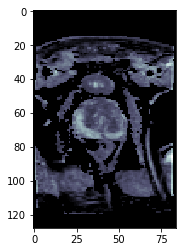

In [5]:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

pat_name = dataset.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print("Patient's name...:", display_name)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
im = dataset.pixel_array
plt.imshow(im, cmap=plt.cm.bone)
plt.show()

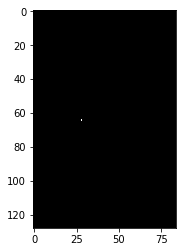

In [6]:
# Apply bitmask
applied_mask = bmp * im
plt.imshow(applied_mask, cmap=plt.cm.bone)
plt.show()

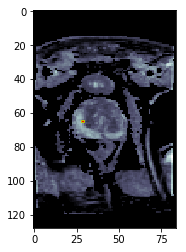

1
1


In [18]:
plt.imshow(im, cmap=plt.cm.bone)
ax = plt.gca()

# Contours
contours, hierarchy = cv2.findContours(image = bmp, mode = cv2.RETR_TREE, method = cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)
c_0 = contours[0] 

# Get the current reference
x, y, w, h = cv2.boundingRect(c_0)   
rect = Rectangle((x, y),w,h,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)

# Outermost square is 1.4 times the longer rectangle length
s = max(w, h)*1.4
s_x = x-(s-w)/2
s_y = y-(s-h)/2
square = Rectangle((s_x, s_y),s,s,linewidth=1,edgecolor='y',facecolor='none')
ax.add_patch(square)

plt.show()
print(w)
print(h)

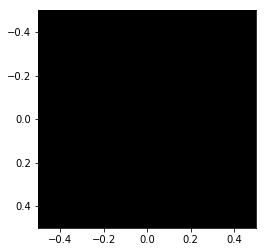

(1, 1)
[[1986]]


In [17]:
# Crop image as square
s_y = round(s_y)
s_x = round(s_x)
s = round(s)

im_crop = im[s_y:s_y+s , s_x:s_x+s]
plt.imshow(im_crop, cmap='gray')
plt.show()
print(im_crop.shape)

print(im_crop)

FileNotFoundError: [Errno 2] No such file or directory: 'lesions_cropped/cropped_ADC_0000_IM-0003-0010.png'

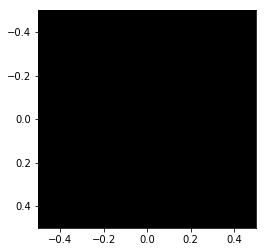

In [10]:
plt.imshow(im_crop, cmap='gray')
plt.savefig('lesions_cropped/cropped_ADC_0000_IM-0003-0010.png')
plt.show()